In [9]:
import linopy
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
from shapely import wkt
import numpy as np

In [10]:
mwperkm2_wind = 4.5 ## originally 9 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET
mwperkm2_solar = 15 ## originally 30 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET

maxcapacityfor_spp = 90
maxcapacityfor_vspp = 10

radius_spp_wind = np.round(np.sqrt(maxcapacityfor_spp/(mwperkm2_wind * 3.14)) / 100,4)
radius_vspp_wind = np.round(np.sqrt(maxcapacityfor_vspp/(mwperkm2_wind * 3.14)) / 100,4)

radius_spp_solar = np.round(np.sqrt(maxcapacityfor_spp/(mwperkm2_solar * 3.14)) / 100,4)
radius_vspp_solar = np.round(np.sqrt(maxcapacityfor_vspp/(mwperkm2_solar * 3.14)) / 100,4)

print('radius_spp_wind km = ',radius_spp_wind*100,' buffer = ',radius_spp_wind)
print('radius_vspp_wind km = ',radius_vspp_wind*100,' buffer = ',radius_vspp_wind)
print('radius_spp_solar km = ',radius_spp_solar*100,' buffer = ',radius_spp_solar)
print('radius_vspp_solar km = ',radius_vspp_solar*100,' buffer = ',radius_vspp_solar)

radius_spp_wind km =  2.52  buffer =  0.0252
radius_vspp_wind km =  0.84  buffer =  0.0084
radius_spp_solar km =  1.38  buffer =  0.0138
radius_vspp_solar km =  0.45999999999999996  buffer =  0.0046


In [11]:
xr_out = xr.open_dataset('Output\\xr_output.nc')
print(xr_out)
print("cap_SPP_wind = ",xr_out['cap_SPP_wind'].sum())
print("cap_VSPP_wind = ",xr_out['cap_VSPP_wind'].sum())
print("cap_SPP_solar = ",xr_out['cap_SPP_solar'].sum())
print("cap_VSPP_solar = ",xr_out['cap_VSPP_solar'].sum())

<xarray.Dataset>
Dimensions:         (lat: 1070, lon: 597)
Coordinates:
  * lat             (lat) float64 5.621 5.635 5.649 5.663 ... 20.44 20.45 20.46
  * lon             (lon) float64 97.35 97.37 97.38 97.39 ... 105.6 105.6 105.6
Data variables:
    SI_Solar        (lat, lon) float64 ...
    SI_Wind         (lat, lon) float64 ...
    AVA_Wind        (lat, lon) float32 ...
    AVA_Solar       (lat, lon) float32 ...
    ADM1_EN         (lat, lon) object ...
    region          (lat, lon) object ...
    cap_SPP_wind    (lat, lon) float64 ...
    cap_VSPP_wind   (lat, lon) float64 ...
    cap_SPP_solar   (lat, lon) float64 ...
    cap_VSPP_solar  (lat, lon) float64 ...
cap_SPP_wind =  <xarray.DataArray 'cap_SPP_wind' ()>
array(27770.6702652)
cap_VSPP_wind =  <xarray.DataArray 'cap_VSPP_wind' ()>
array(350.41501045)
cap_SPP_solar =  <xarray.DataArray 'cap_SPP_solar' ()>
array(309615.30659676)
cap_VSPP_solar =  <xarray.DataArray 'cap_VSPP_solar' ()>
array(77583.25058651)


In [12]:
df_wind = xr_out.to_dataframe()
df_wind.reset_index(inplace=True)
df_wind = gpd.GeoDataFrame(df_wind, geometry =gpd.points_from_xy(df_wind['lon'],df_wind['lat']))
df_wind.crs = {'init': 'epsg:4326'}
for i,c in enumerate(df_wind.columns):
    if c not in (['lon','lat','SI_Wind','region','ADM1_EN','cap_SPP_wind','cap_VSPP_wind','geometry']):
        df_wind = df_wind.drop(columns=c)

df_wind_spp = df_wind.drop(columns='cap_VSPP_wind')
df_wind_spp = df_wind_spp.loc[df_wind_spp['cap_SPP_wind'] > 0]
df_wind_spp.reset_index(inplace=True,drop=True)
df_wind_spp.crs = {'init': 'epsg:4326'}
df_wind_spp['buffer'] = df_wind_spp['geometry'].buffer(radius_spp_wind)
df_wind_spp = df_wind_spp.set_geometry('buffer')

df_wind_vspp = df_wind.drop(columns='cap_SPP_wind')
df_wind_vspp = df_wind_vspp.loc[df_wind_vspp['cap_VSPP_wind'] > 0]
df_wind_vspp.reset_index(inplace=True,drop=True)
df_wind_vspp.crs = {'init': 'epsg:4326'}
df_wind_vspp['buffer'] = df_wind_vspp['geometry'].buffer(radius_vspp_wind)
df_wind_vspp = df_wind_vspp.set_geometry('buffer')

df_wind_spp.to_csv('Output\\Output_wind_spp.csv',index=False,encoding="utf-8-sig")
df_wind_vspp.to_csv('Output\\Output_wind_vspp.csv',index=False,encoding="utf-8-sig")

print(df_wind_spp)
print(df_wind_vspp)

C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\basna\AppData\Local\Temp\ipykernel_15004\2487634311.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()'

           lat         lon   SI_Wind    ADM1_EN region  cap_SPP_wind  \
0     6.370833  101.143056  0.793922       Yala     R3     19.035002   
1     6.398611  101.045833  0.746992       Yala     R3     30.375000   
2     6.412500  100.934722  0.625325       Yala     R3     17.010000   
3     6.426389  101.129167  0.831233       Yala     R3     34.424999   
4     6.468056  100.934722  0.320235       Yala     R3     21.059999   
..         ...         ...       ...        ...    ...           ...   
398  18.176389  103.573611  2.033327  Bueng Kan     R2     76.139999   
399  18.190278  103.393056  2.009303  Bueng Kan     R2     85.860001   
400  18.190278  103.448611  2.018900  Bueng Kan     R2     87.075005   
401  18.218056  103.323611  1.887942  Bueng Kan     R2     79.379997   
402  18.273611  103.337500  1.979856  Bueng Kan     R2     87.480003   

                       geometry  \
0     POINT (101.14306 6.37083)   
1     POINT (101.04583 6.39861)   
2     POINT (100.93472 6.41250

In [13]:
df_solar = xr_out.to_dataframe()
df_solar.reset_index(inplace=True)
df_solar = gpd.GeoDataFrame(df_solar, geometry =gpd.points_from_xy(df_solar['lon'],df_solar['lat']))
df_solar.crs = {'init': 'epsg:4326'}
for i,c in enumerate(df_solar.columns):
    if c not in (['lon','lat','SI_Solar','region','ADM1_EN','cap_SPP_solar','cap_VSPP_solar','geometry']):
        df_solar = df_solar.drop(columns=c)

df_solar_spp = df_solar.drop(columns='cap_VSPP_solar')
df_solar_spp = df_solar_spp.loc[df_solar_spp['cap_SPP_solar'] > 0]
df_solar_spp.reset_index(inplace=True,drop=True)
df_solar_spp.crs = {'init': 'epsg:4326'}
df_solar_spp['buffer'] = df_solar_spp['geometry'].buffer(radius_spp_solar)
df_solar_spp = df_solar_spp.set_geometry('buffer')

df_solar_vspp = df_solar.drop(columns='cap_SPP_solar')
df_solar_vspp = df_solar_vspp.loc[df_solar_vspp['cap_VSPP_solar'] > 0]
df_solar_vspp.reset_index(inplace=True,drop=True)
df_solar_vspp.crs = {'init': 'epsg:4326'}
df_solar_vspp['buffer'] = df_solar_vspp['geometry'].buffer(radius_vspp_solar)
df_solar_vspp = df_solar_vspp.set_geometry('buffer')


df_solar_spp.to_csv('Output\\Output_solar_spp.csv',index=False,encoding="utf-8-sig")
df_solar_vspp.to_csv('Output\\Output_solar_vspp.csv',index=False,encoding="utf-8-sig")

print(df_solar_spp)
print(df_solar_vspp)

C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\basna\AppData\Local\Temp\ipykernel_15004\2978919321.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()'

            lat         lon  SI_Solar     ADM1_EN region  cap_SPP_solar  \
0      6.009722  101.893056  2.428311  Narathiwat     R3      90.000000   
1      6.009722  101.934722  1.238237  Narathiwat     R3      78.300003   
2      6.106944  101.920833  0.096266  Narathiwat     R3      68.850006   
3      6.162500  101.698611  0.279931  Narathiwat     R3      56.700005   
4      6.190278  102.115278  1.465709  Narathiwat     R3      75.600006   
...         ...         ...       ...         ...    ...            ...   
4025  18.301389  103.212500  0.888400   Bueng Kan     R2      90.000000   
4026  18.370833  100.184722  1.247044       Phrae     R4      68.850006   
4027  18.426389  100.170833  0.612314       Phrae     R4      41.849998   
4028  18.509722  100.198611  0.073157       Phrae     R4      54.000000   
4029  18.620833  100.768056  0.804748         Nan     R4      41.849998   

                        geometry  \
0      POINT (101.89306 6.00972)   
1      POINT (101.93472 6.0

C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


total wind capacity =  28121.08527564991
total SPP wind capacity =  27770.670265197612
total VSPP wind capacity =  350.4150104523


<Axes: >

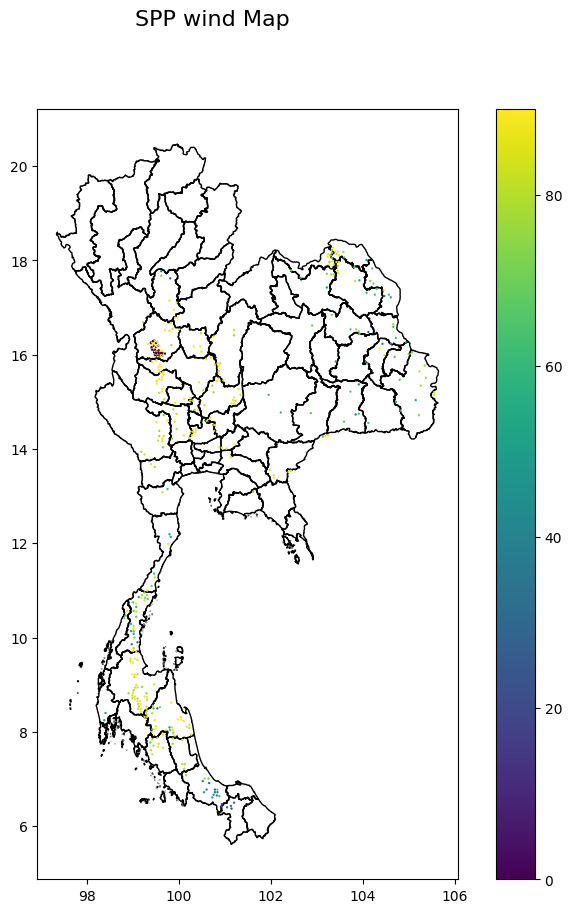

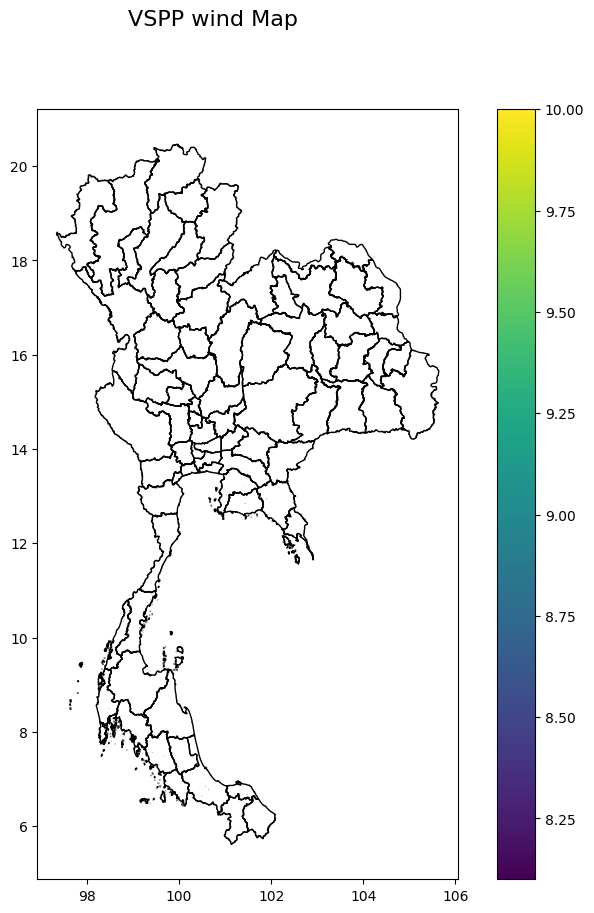

In [14]:
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}

print("total wind capacity = ", df_wind_spp['cap_SPP_wind'].sum() + df_wind_vspp['cap_VSPP_wind'].sum())
print("total SPP wind capacity = ", df_wind_spp['cap_SPP_wind'].sum())
print("total VSPP wind capacity = ", df_wind_vspp['cap_VSPP_wind'].sum())

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('SPP wind Map', fontsize=16)
thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
df_wind_spp.plot(ax = ax,legend=True,zorder = 1,column = 'cap_SPP_wind')

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('VSPP wind Map', fontsize=16)
thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
df_wind_vspp.plot(ax = ax,legend=True,zorder = 1,column = 'cap_VSPP_wind')


total solar capacity =  387198.5571832696
total SPP solar capacity =  309615.3065967607
total VSPP solar capacity =  77583.25058650888


<Axes: >

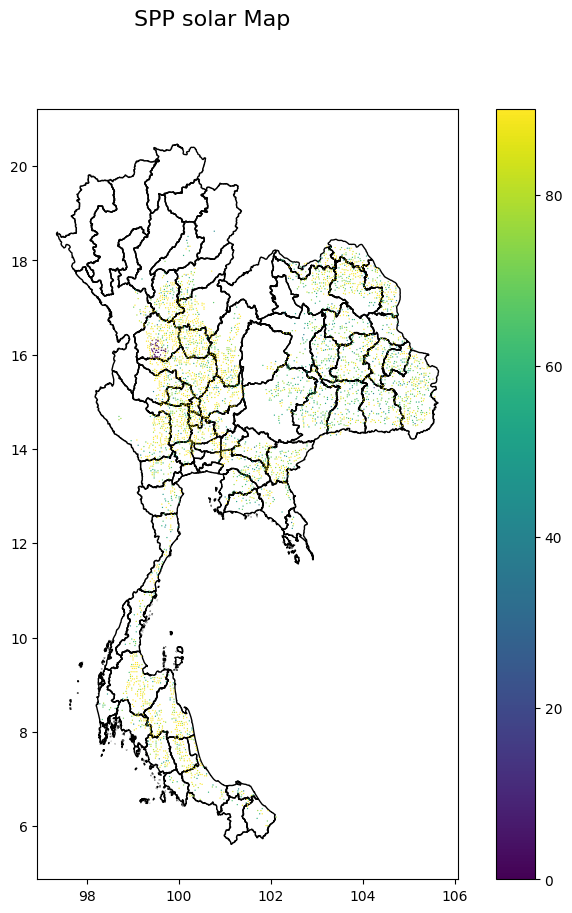

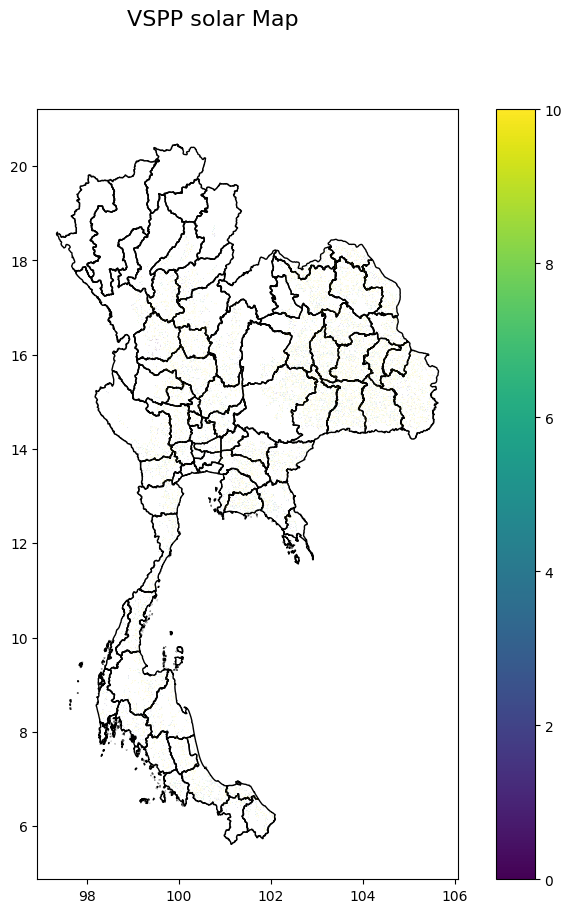

In [15]:
print("total solar capacity = ", df_solar_spp['cap_SPP_solar'].sum() + df_solar_vspp['cap_VSPP_solar'].sum())
print("total SPP solar capacity = ", df_solar_spp['cap_SPP_solar'].sum())
print("total VSPP solar capacity = ", df_solar_vspp['cap_VSPP_solar'].sum())

fig, ax = plt.subplots(figsize=(10,10))

fig.suptitle('SPP solar Map', fontsize=16)
thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
df_solar_spp.plot(ax = ax,legend=True,zorder = 1,column = 'cap_SPP_solar')

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('VSPP solar Map', fontsize=16)
thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
df_solar_vspp.plot(ax = ax,legend=True,zorder = 1,column = 'cap_VSPP_solar')

C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\geopandas\plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\geopandas\plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\geopandas\plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


total wind capacity =  121.094997406
total SPP wind capacity =  121.094997406
total VSPP wind capacity =  0.0
total solar capacity =  6999.00017797939
total SPP solar capacity =  5059.350162506
total VSPP solar capacity =  1939.65001547339


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\geopandas\plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


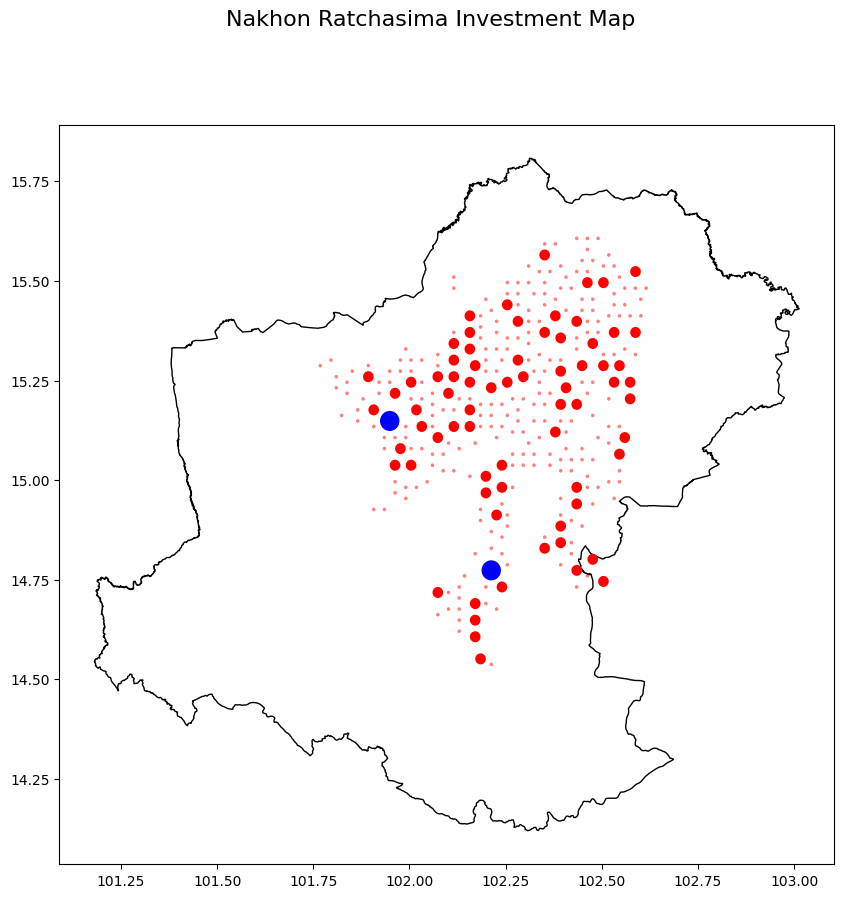

In [16]:
province = 'Nakhon Ratchasima'
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}
specificarea = thailandmap.loc[thailandmap['ADM1_EN'] == province]
bound = specificarea.unary_union.bounds

print("total wind capacity = ", df_wind_spp['cap_SPP_wind'].loc[df_wind_spp['ADM1_EN'] == province].sum() + df_wind_vspp['cap_VSPP_wind'].loc[df_wind_vspp['ADM1_EN'] == province].sum())
print("total SPP wind capacity = ", df_wind_spp['cap_SPP_wind'].loc[df_wind_spp['ADM1_EN'] == province].sum())
print("total VSPP wind capacity = ", df_wind_vspp['cap_VSPP_wind'].loc[df_wind_vspp['ADM1_EN'] == province].sum())

print("total solar capacity = ", df_solar_spp['cap_SPP_solar'].loc[df_solar_spp['ADM1_EN'] == province].sum() + df_solar_vspp['cap_VSPP_solar'].loc[df_solar_vspp['ADM1_EN'] == province].sum())
print("total SPP solar capacity = ", df_solar_spp['cap_SPP_solar'].loc[df_solar_spp['ADM1_EN'] == province].sum())
print("total VSPP solar capacity = ", df_solar_vspp['cap_VSPP_solar'].loc[df_solar_vspp['ADM1_EN'] == province].sum())

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle(province + ' Investment Map ', fontsize=16)
specificarea.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
try:
    df_wind_spp.loc[df_wind_spp['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 1,column = 'cap_SPP_wind',color = 'blue')
    df_wind_vspp.loc[df_wind_vspp['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 2,column = 'cap_VSPP_wind',color = 'blue',alpha = 0.5)
except:
    None
try:
    df_solar_spp.loc[df_solar_spp['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 3,column = 'cap_SPP_solar',color = 'red')
    df_solar_vspp.loc[df_solar_vspp['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 4,column = 'cap_VSPP_solar',color = 'red',alpha = 0.5)
except:
    None